# Machine Learning 6.5

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Importing Data
df = pd.read_csv(r'C:\Users\ProUser11\Desktop\DATA ANALYSIS\Tasks\Module 7\Analysis\02 Data\Prepared Data\ds_salaries ISO_A3.csv')

In [5]:
df.shape

(2584, 11)

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ESP,100,ESP,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,USA,100,USA,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,USA,100,USA,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CAN,100,CAN,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CAN,100,CAN,M


In [7]:
# Rename Columns
df.rename(columns={' salary_in_usd ': 'salary_in_usd'}, inplace=True)
df.rename(columns={' salary ': 'salary'}, inplace=True)

### 2. The elbow technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the 'employee_residence' column
df['employee_residence_encoded'] = label_encoder.fit_transform(df['employee_residence'])

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['employee_residence_encoded'].values.reshape(-1,1)
y = df['salary_in_usd'].values.reshape(-1,1)

In [15]:
# Print List of countries and Numbers
encoded_country_df = df[['employee_residence', 'employee_residence_encoded']].drop_duplicates().sort_values('employee_residence_encoded')

print(encoded_country_df)

     employee_residence  employee_residence_encoded
2246                ARE                           0
992                 ARG                           1
1008                ARM                           2
1452                ASM                           3
202                 AUS                           4
...                 ...                         ...
1785                TUR                          73
285                 UKR                          74
1                   USA                          75
652                 UZB                          76
873                 VNM                          77

[78 rows x 2 columns]


In [17]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1187645.2244582046,
 -87326.5809332114,
 -38970.219194167934,
 -17900.705604343246,
 -9402.420128838927,
 -6277.639446111165,
 -4546.091330960881,
 -2882.1115026916614,
 -2073.7368921072184]

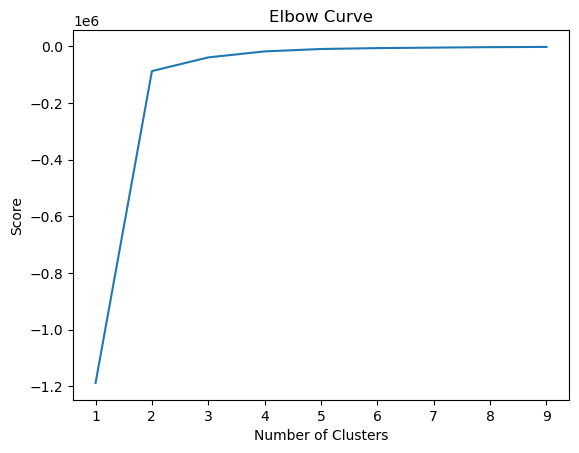

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [19]:
# There's a big jump from 1 to 2. So 2 would be the optimal number of clusters.

In [23]:
# Create the k-means object
kmeans = KMeans(n_clusters=2)

# Fit the k-means model to data
kmeans.fit(X)  # Use the normalized data for clustering

KMeans(n_clusters=2)

In [27]:
# Fit the k-means model and get cluster labels
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels as a new column to the DataFrame
df['clusters'] = cluster_labels

In [28]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_residence_encoded,clusters
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ESP,100,ESP,L,25,1
1,2023,MI,CT,ML Engineer,30000,USD,30000,USA,100,USA,S,75,0
2,2023,MI,CT,ML Engineer,25500,USD,25500,USA,100,USA,S,75,0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CAN,100,CAN,M,12,1
4,2023,SE,FT,Data Scientist,120000,USD,120000,CAN,100,CAN,M,12,1


In [29]:
df['clusters'].value_counts()

0    2008
1     576
Name: clusters, dtype: int64

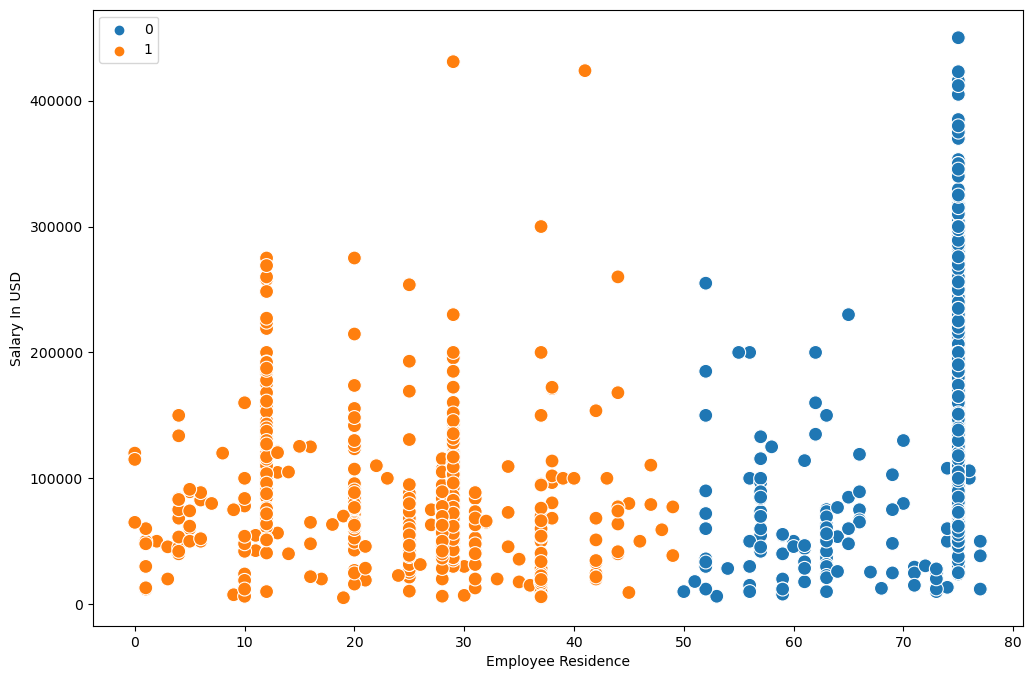

In [30]:
# Plot the clusters For Employee Residence and Salary In USD

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['employee_residence_encoded'], y=df['salary_in_usd'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Employee Residence') # Label x-axis.
plt.ylabel('Salary In USD') # Label y-axis.
plt.show()

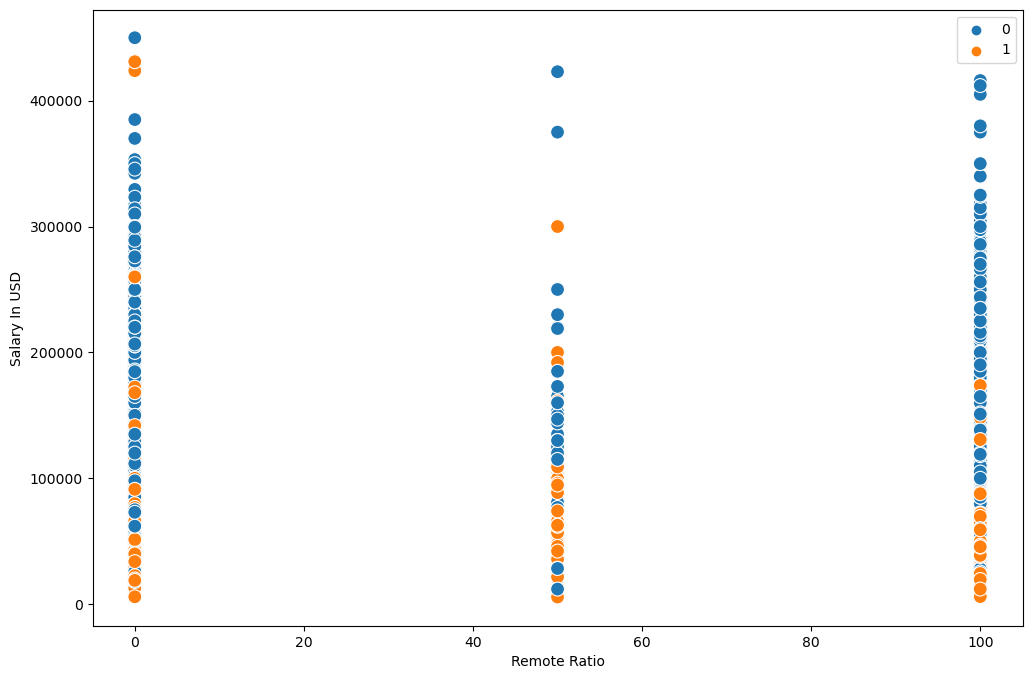

In [31]:
# Plot the clusters For Remote Ratio and Salary In USD
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['remote_ratio'], y=df['salary_in_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Remote Ratio') 
plt.ylabel('Salary In USD') 
plt.show()

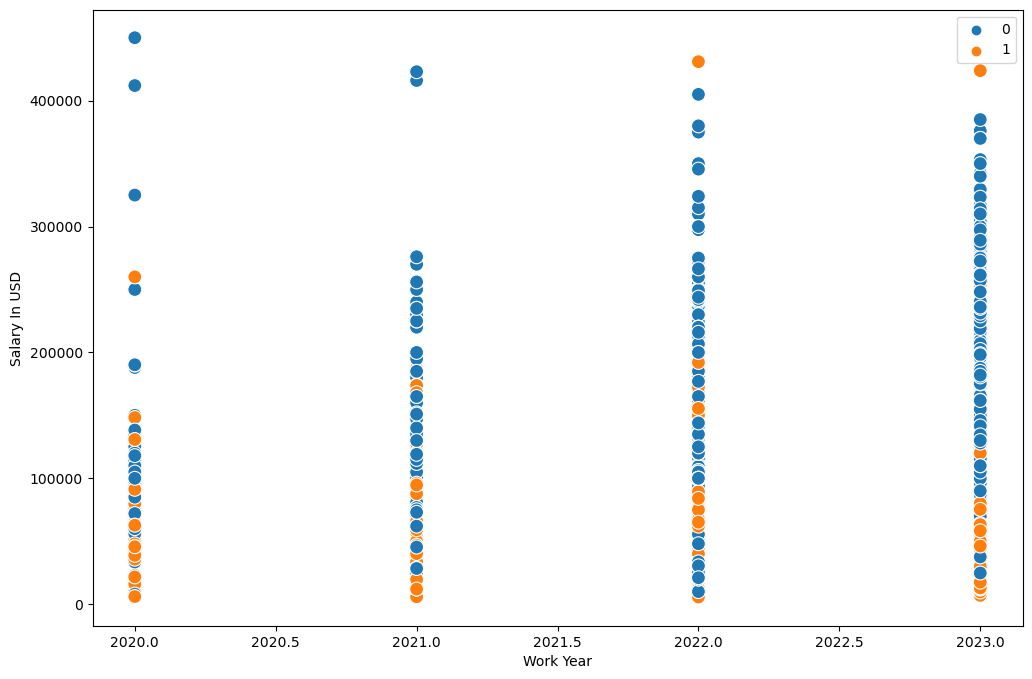

In [32]:
# Plot the clusters For Work Year and Salary In USD
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['work_year'], y=df['salary_in_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Work Year') 
plt.ylabel('Salary In USD') 
plt.show()

In [33]:
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [35]:
df.groupby('cluster').agg({'work_year':['mean', 'median'], 
                         'remote_ratio':['mean', 'median'], 
                         'employee_residence_encoded':['mean', 'median'],
                          'salary_in_usd':['mean', 'median']})

work_year         remote_ratio        employee_residence_encoded  \
                mean  median         mean median                       mean   
cluster                                                                       
pink     2022.390936  2022.0    48.954183   50.0                  74.266434   
purple   2021.987847  2022.0    55.815972   50.0                  24.685764   

                salary_in_usd            
        median           mean    median  
cluster                                  
pink      75.0  148920.710159  144000.0  
purple    28.0   79334.711806   68008.0

In [36]:
# employees that are employeed in 2023 have a higher cluster and may be getting paid more.